# Data Analysis I

#### Loading Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys, os

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *

#### Loading Data

In [2]:
df_ms = pd.read_csv(r"../data/msv7.csv")
df_hs = pd.read_csv(r"../data/hsv7.csv")
df_hs.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,literature,eng,maths,physics,chemistry,biology,geography,history,civics,amharic,ict,ent-ship,hpe,gpa,matrik
0,abem kibru worku,b,15,m,ethiopian,ethiopia,no,9,paid,both,little,agree,agree,somehow agree,public,zenebework,30-60,middle child,2.0,passion,eth-lang,no,7.0,authoritative,0.0,phy,3.25,76.75,93.67,70.56,72.76,44.70,66.37,73.02,72.19,87.43,96.58,71.31,76.26,64.90,74.3,72.6
1,amanuel demeke hailu,a,14,m,ethiopian,ethiopia,no,9,paid,both,little,agree,strongly agree,somehow agree,private,zenebework,15-,middle child,3.0,gibson,eth-lang,no,7.5,authoritative,0.0,none,3.50,77.52,94.33,62.57,70.85,77.20,69.77,74.17,81.65,76.48,84.84,80.42,77.16,86.00,77.9,75.9
2,ananya girma tegegn,a,14,m,ethiopian,ethiopia,no,9,scholarship,both,a lot,strongly agree,strongly agree,strongly agree,public,cmc,30-60,first child,3.0,dr bekele,eth-lang,no,7.5,authoritative,0.0,none,4.50,88.27,91.67,97.16,85.77,97.90,96.27,95.33,83.40,93.05,97.18,94.27,88.76,89.50,92.2,92.6
3,blen amare mesfin,a,15,f,ethiopian,ethiopia,no,9,paid,both,a lot,strongly agree,strongly agree,strongly agree,service,megenagna,30-60,last child,3.0,magic carpet,eth-lang,no,8.0,permissive,1.0,none,4.50,73.81,91.00,72.55,67.95,76.70,79.35,78.50,75.03,83.81,96.15,88.55,83.16,84.00,80.8,78.1
4,dagmawi misganaw bimerew,a,14,m,ethiopian,ethiopia,yes,9,paid,both,a lot,agree,agree,agree,private,bole bulbula,30-60,middle child,0.0,school of nations,eth-lang,no,8.5,authoritative,0.0,none,3.75,91.77,97.67,90.60,76.69,71.97,84.72,85.04,84.30,88.48,94.10,92.66,85.66,93.25,87.5,84.9


In [3]:
df_ms.columns

Index(['name', 'conduct', 'age', 'gender', 'nationality', 'pob',
       'tutor/makeup', 'grade', 'admission', 'guardian', 'time_with_parents',
       'communication_with_parents', 'reward_for_achievements',
       'parent_understanding', 'transport_type', 'residence', 'travel time',
       'birth_order', 'exercice', 'previous_school', 'mother_tongue',
       'curriculum', 'sleeping time_in_pm', 'parenting_style', 'trauma',
       'type', 'quality', 'english', 'amharic', 'arabic', 'geez', 'ict',
       'maths', 'ss', 'gp', 'is', 'moral', 'hpe', 'art', 'chemistry',
       'physics', 'gpa'],
      dtype='object')

In [4]:
df_hs.rename(columns = {'eng':'english'}, inplace = True)

In [5]:
df_hs.birth_order = df_hs['birth_order'].replace('only child', 'first child')
df_hs.birth_order.value_counts()

first child     80
middle child    47
last child      45
Name: birth_order, dtype: int64

In [6]:
ms_filter = df_ms[['conduct', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics', 'chemistry','amharic', 'geez', 'arabic', 'english', 'ict', 'ss', 'gp','is','hpe']]

In [7]:
hs_filter = df_hs[['conduct', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa', 'maths', 'physics' , 'chemistry', 'biology', 'english', 'literature', 'amharic', 'hpe', 'ict', 'geography', 'history']]

#### Concatenating Data

In [8]:
frames = [ms_filter, hs_filter]
df = pd.concat(frames)


In [9]:
df.head()

,conduct,age,gender,grade,admission,birth_order,gpa,maths,physics,chemistry,amharic,geez,arabic,english,ict,ss,gp,is,hpe,biology,literature,geography,history
0,a,10.0,f,5,paid,middle child,89.4,76.38,NaN,NaN,94.58,84.41,88.45,94.86,88.52,85.93,95.00,82.01,95.48,NaN,NaN,NaN,NaN
1,b,12.0,m,5,scholarship,first child,81.9,74.92,NaN,NaN,77.39,80.98,81.86,74.12,76.90,70.32,94.75,74.16,96.15,NaN,NaN,NaN,NaN
2,a,10.0,m,5,paid,last child,87.9,84.33,NaN,NaN,86.58,74.69,95.04,80.12,95.52,81.42,93.75,85.45,94.39,NaN,NaN,NaN,NaN
3,c,11.0,m,5,paid,last child,85.9,90.63,NaN,NaN,91.68,86.70,89.64,82.67,87.81,81.14,82.50,80.86,93.89,NaN,NaN,NaN,NaN
4,b,11.0,f,5,paid,middle child,95.5,96.00,NaN,NaN,96.99,92.09,97.60,96.31,98.62,89.07,99.75,94.73,88.69,NaN,NaN,NaN,NaN


In [10]:
df.shape

(287, 23)

In [11]:
df.admission.value_counts()

paid           195
scholarship     92
Name: admission, dtype: int64

In [12]:
df.gender.value_counts()

f    150
m    137
Name: gender, dtype: int64

In [13]:
df.grade.value_counts()

9     57
10    44
12    40
7     37
11    31
8     30
6     26
5     22
Name: grade, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 171
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   conduct      287 non-null    object 
 1   age          287 non-null    float64
 2   gender       287 non-null    object 
 3   grade        287 non-null    int64  
 4   admission    287 non-null    object 
 5   birth_order  287 non-null    object 
 6   gpa          287 non-null    float64
 7   maths        287 non-null    float64
 8   physics      205 non-null    float64
 9   chemistry    205 non-null    float64
 10  amharic      287 non-null    float64
 11  geez         115 non-null    float64
 12  arabic       115 non-null    float64
 13  english      287 non-null    float64
 14  ict          287 non-null    float64
 15  ss           115 non-null    float64
 16  gp           115 non-null    float64
 17  is           115 non-null    float64
 18  hpe          287 non-null    float64
 19  biology 

(0.0, 100.0)

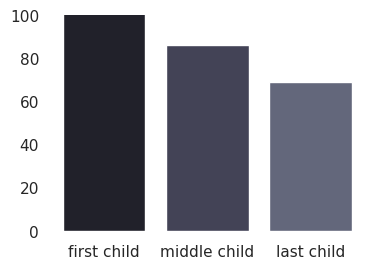

In [15]:
sns.set(rc={'figure.figsize':(4.0,2.8)})
sns.set_palette("bone")
sns.set_style("white")
ax = sns.countplot(data = df, x='birth_order', order=df['birth_order'].value_counts().index)
sns.despine(top=True, left=True, bottom=True)
plt.ylabel("", size=10)
plt.xlabel("", size=10)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set_ylim(bottom=0, top=100)


#### Does birth order affect Performance?

    Are first born the smartest?
    Are the middle ones trouble makers?
    Are last born underachievers?

Text(-21.250000000000007, 0.5, '')

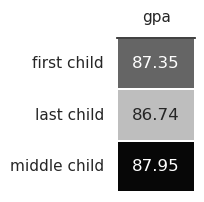

In [16]:
bg = df.groupby('birth_order')[['gpa']].mean()
plt.figure(figsize=(1, 2))
sns.heatmap(bg, annot=True, cmap='Greys', vmin=86, vmax=88, fmt='.2f', linewidths=.3, cbar = False)
sns.despine(top=False, left=True, bottom=True) 
sns.set_style("white")
plt.ylabel("") 

#### Data Analysis on Birth order relation with Grades

     Mathematics and Science subjects performances relationship with birth order.

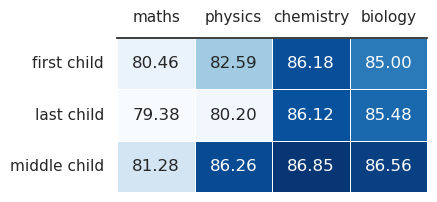

In [66]:
# mean marks and project submissions for each student
mainx = df.groupby('birth_order')[['maths', 'physics', 'chemistry','biology']].mean()
legit_heat(mainx, 80, 87, 4, 'Blues')  

     Language subjects performances relationship with birth order.

In [18]:
df.groupby('birth_order')[['english', 'amharic']].mean()

,english,amharic
birth_order,,
first child,89.742756,89.800933
last child,88.185362,86.473478
middle child,89.573605,89.256977


    Social subjects and physical Education performances relationship with birth order. 

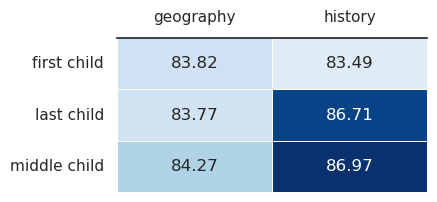

In [67]:
ghh = df.groupby('birth_order')[['geography', 'history']].mean()
legit_heat(ghh, 83, 87, 4, 'Blues')  

#### Bivariate Anlaysis

    GPA vs Birth Order

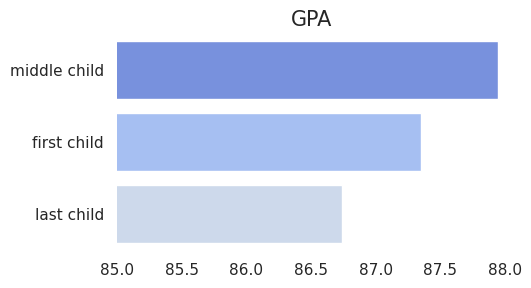

In [20]:
legitbar(df, 'gpa', 'birth_order', 'GPA', 85, 88)

    Mathematics vs Birth Order

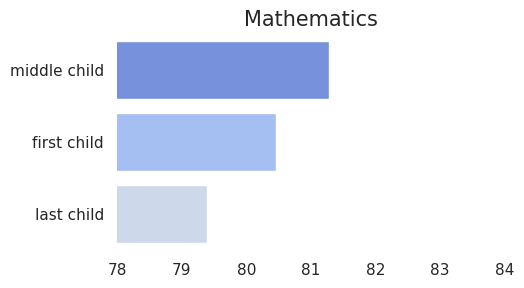

In [21]:
legitbar(df, 'maths', 'birth_order', 'Mathematics', 78, 84)

     Chemistry vs Birth Order

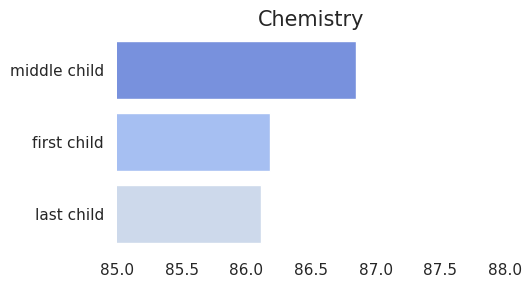

In [22]:
legitbar(df, 'chemistry', 'birth_order', 'Chemistry', 85, 88)



     Physics vs Birth Order

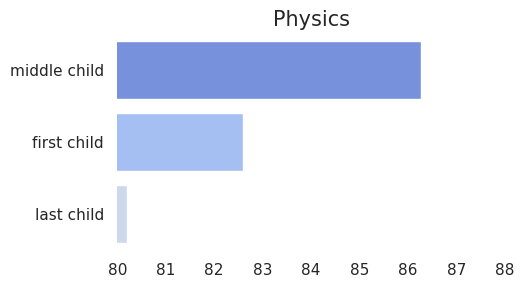

In [23]:
legitbar(df, 'physics', 'birth_order', 'Physics', 80, 88)

     Biology vs Birth Order

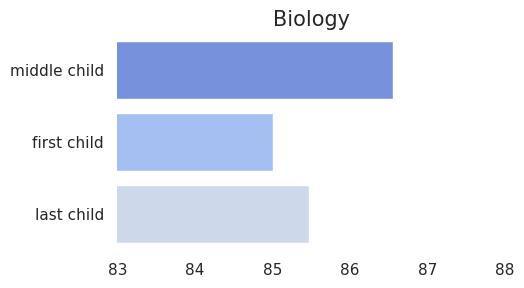

In [24]:
legitbar(df, 'biology', 'birth_order', 'Biology', 83, 88)

     HPE vs Birth Order

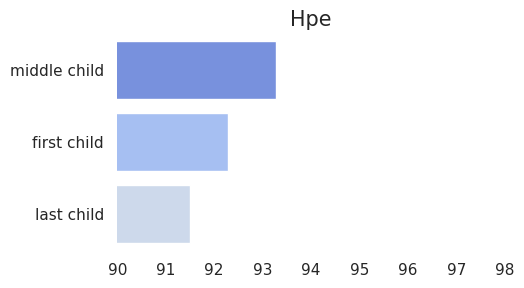

In [25]:
legitbar(df, 'hpe', 'birth_order', 'Hpe', 90, 98)

     Geography vs Birth Order

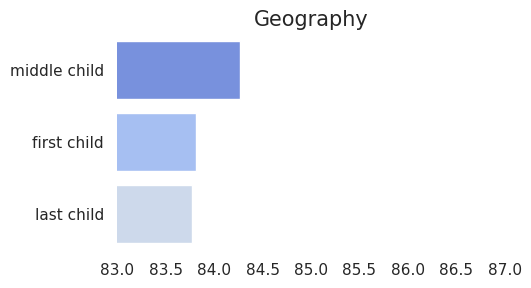

In [26]:
legitbar(df, 'geography', 'birth_order', 'Geography', 83, 87)

     History vs Birth Order

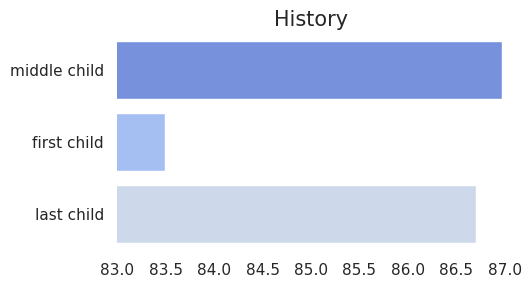

In [27]:
legitbar(df, 'history', 'birth_order', 'History', 83, 87)

#### Multivariate Analysis

      Admission type effects on the birth_order and performance relationship

In [28]:
df_paid = df[df.admission == 'paid']
df_scholar = df[df.admission == 'scholarship']

##### Paid

In [29]:
df_paid.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

,gpa,maths,physics,chemistry,biology
birth_order,,,,,
first child,86.367033,78.247003,81.002769,83.817385,82.919762
last child,84.285714,75.588571,76.650000,81.952273,80.090667
middle child,86.535484,78.646452,84.808286,84.794286,83.884762


##### Scholarship

In [30]:
df_scholar.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

,gpa,maths,physics,chemistry,biology
birth_order,,,,,
first child,89.546341,85.361707,85.382162,90.336216,88.247037
last child,90.562963,85.282222,83.590870,90.098261,89.730000
middle child,91.587500,88.069583,88.476087,89.972174,90.312667


     Gender effects on the birth_order and performance relationship

In [31]:
dfm = df[df.gender == 'm']
dff = df[df.gender == 'f']

     Male Students Birth Order and Major Grades

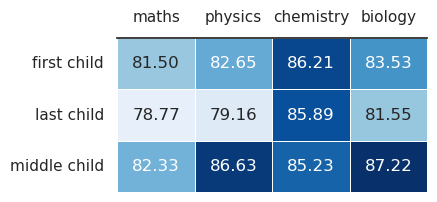

In [65]:
t = dfm.groupby('birth_order')[['maths', 'physics', 'chemistry', 'biology']].mean()
legit_heat(t, 78, 87, 4, 'Blues') 

     Female Students Birth Order and Major Grades

In [33]:
t = dff.groupby('birth_order')[['gpa', 'maths', 'physics', 'chemistry', 'biology']].mean()

     Male Students Birth Order and Social Subjects Grade


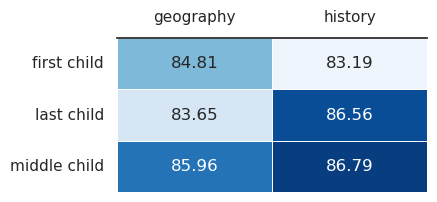

In [34]:
t = dfm.groupby('birth_order')[['geography', 'history']].mean()
legit_heat(t, 83, 87, 4, 'Blues')  

     Female Students Birth Order and Social Subjects Grade

In [35]:
dff.groupby('birth_order')[['geography', 'history']].mean()

,geography,history
birth_order,,
first child,82.722069,83.821724
last child,83.844000,86.804500
middle child,81.733125,87.252500


#### Feature Engineering for Conduct values 

In [36]:
def conval(x):
    if x == 'a':
        return 1
    elif x == 'b':
        return 2
    else:
        return 3 
    
df['convalue'] = df.conduct.apply(conval)

In [37]:
df.columns

Index(['conduct', 'age', 'gender', 'grade', 'admission', 'birth_order', 'gpa',
       'maths', 'physics', 'chemistry', 'amharic', 'geez', 'arabic', 'english',
       'ict', 'ss', 'gp', 'is', 'hpe', 'biology', 'literature', 'geography',
       'history', 'convalue'],
      dtype='object')

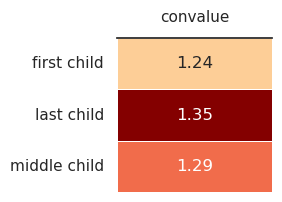

In [72]:
t = df.groupby('birth_order')[['convalue']].mean()
legit_heat(t, 1.2, 1.35, 2, 'OrRd')  